# Análise do Projeto de IT

**BoneAge**. Projeto MackPesquisa de estimativa da idade óssea a partir radiografias do Hospital Santa Casa. IT-A. Desenvolvimento e treinamento de modelos deep learning para estimativa da idade óssea (Python, TensorFlow). Referência do trabalho: https://www.frontiersin.org/articles/10.3389/frai.2023.1142895/full

In [ ]:
# Atualizar os conceitos em inglês para compreender melhor o texto

 **proposta:** Nesta pesquisa, propomos um novo método de aprendizagem profunda em dois estágios para BAA sem qualquer anotação manual de região, que é um método de aprendizagem profunda,que consiste em uma rede de extração de região óssea crítica em cascata e uma rede de estimativa de idade óssea assistida por gênero.


1.   Primeiro, a rede de extração de região óssea crítica em cascata localiza automaticamente e sequencialmente duas regiões ósseas discriminativas via os mapas visuais de calor.

2.   Em segundo lugar, a fim de obter um BAA preciso, as regiões ósseas críticas extraídas são alimentadas na rede de estimativa de idade óssea assistida por gênero.

Os resultados mostraram que o método proposto alcançou um erro absoluto médio (MAE) de 5,45 meses no conjunto de dados público Radiological Society of North America (RSNA) e 3,34 meses no nosso conjunto de dados privado.

Métodos de avaliação da idade óssea:



*   G&P - O método G&P compara as radiografias com o atlas de referência até que o atlas mais semelhante seja selecionado, e a idade marcada do atlas selecionado representa a idade óssea estimada
*   TW - o método TW é mais complexo, analisa regiões específicas de interesse (ROIs, que consistem nos ossos do rádio, ulna, carpo e metacarpo e falange, como mostrado em Figura 1), e a idade óssea é avaliada individualmente através de um mecanismo de pontuação, em vez de com base em toda a radiografia. Devido às características anatômicas críticas em ROIs que desempenham papéis importantes no BAA, cada ROI é avaliado por um sistema de pontuação numérica, e a idade óssea final é estimada pela média de todos os escores de ROI.

No entanto, esses trabalhos de avaliação convencionais são geralmente conduzidos por radiologistas ou pediatras experientes por meio de inspeção visual e anotação manual, o que não é apenas tedioso, carga de trabalho pesada e demorada, mas também enfrenta a influência de diferentes médicos com padrões diferentes. Como resultado, as abordagens de avaliação automatizada para BAA estão atualmente recebendo atenção crescente.



Os modelos de aprendizagem profunda existentes,

* como redes neurais convolucionais (CNN),
* redes de crença profunda (DBN)
* e redes neurais recorrentes (RNN),

demonstram desempenho efetivo para reconhecimento, segmentação, previsão e, e classificação.

Os métodos de aprendizagem profunda automática para BAA poderiam superar as questões que se referem à subjetividade inerente e demorada da interpretação humana, das variações inter-operador e intra-operador

 [Liu et al. (2019)](https://www.frontiersin.org/journals/artificial-intelligence/articles/10.3389/frai.2023.1142895/full#B14) aplicou métodos de aprendizagem ao rank para problemas de avaliação e propôs uma nova arquitetura VGG-U-Net. [Chu et al. (2018)](https://www.frontiersin.org/journals/artificial-intelligence/articles/10.3389/frai.2023.1142895/full#B4)propôs uma rede totalmente convolucional, U-Net-VGG, isso pode rapidamente obter máscaras precisas para todas as imagens de entrada e transformar o problema de regressão ordenada da avaliação da idade óssea em um subproblema de classificação binária K-1 para reduzir o efeito de outliers'

Métodos com anotação vs sem anotação

Os métodos baseados em anotação com as anotações manuais adicionais geralmente mostram melhor desempenho e maior precisão do que os métodos sem anotação. Os métodos que usam a imagem original como entrada não exploram totalmente a informação local discriminativa e ignoram a análise refinada de regiões específicas, assim, a precisão e interpretabilidade desses métodos tendem a ser pobres. A anotação manual também é demorada e tem dificultado a tradução de métodos experimentais em aplicações clínicas.

 contribuições deste trabalho são resumidas da seguinte forma:
 1.  Este método propõe uma estratégia eficaz para identificar as regiões ósseas críticas para a estimativa da idade óssea, e, o que poderia incentivar o modelo a se concentrar nas características das regiões críticas e enfraquecer a influência de regiões irrelevantes.
 2.  O método proposto alimenta as informações de gênero na rede de avaliação da idade como entrada adicional, o que melhora a generalização da rede de avaliação da idade óssea.
 3.  Esta estrutura de dois estágios, incluindo localização crítica da região óssea e estimativa da idade óssea, é mais interpretável e aumenta a aceitação clínica do método proposto.

## **Arquitetura de rede para avaliação da idade óssea**

Nesta seção, apresentamos a arquitetura do método proposto em dois estágios, que compõe uma rede crítica de extração de região óssea e uma rede de reconhecimento de idade óssea. Especificamente, todos os dados da imagem da mão foram alimentados em uma rede Inception V3 melhorada com CBAM como entrada, gerando mapas de calor visual. A área de pico de atenção do mapa de calor pode ser considerada uma região óssea crítica, e tal região óssea crítica (área carpal) foi cortada e preservada. Em seguida, a imagem original foi mascarada por um retângulo preto na área óssea crítica. A imagem mascarada passou pela rede de extração da região crítica novamente, e outra região óssea crítica (metacarpo e área do dedo) pôde ser extraída. Para a rede de reconhecimento de idade óssea, imagens cortadas automaticamente são inseridas no modelo Xception e no modelo ResNet50 para aprendizado de recursos. Então,de acordo com o método de fusão média, as características ósseas do carpo extraídas do modelo Xception e as características ósseas do metacarpo e falange extraídas do modelo Res-Net50 são trocadas e concatenadas. As informações de gênero são então inseridas na segunda rede como entrada adicional. Finalmente, os vetores de características concatenadas foram enviados para a camada totalmente conectada para estimativa da idade óssea. A arquitetura de rede BAA é mostrada em A arquitetura de rede BAA é mostrada em A arquitetura de rede BAA é mostrada em Figura 2.

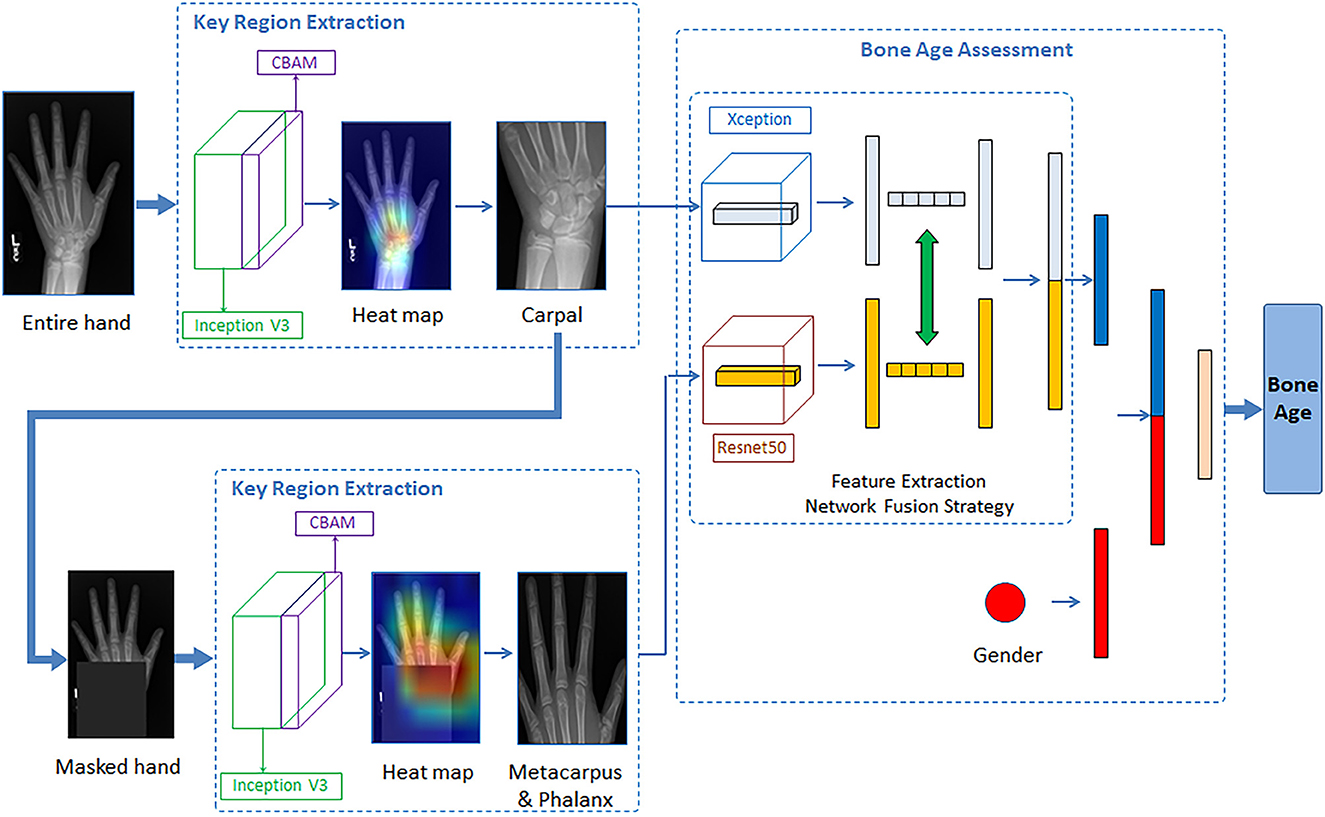

**Conclusão**

Neste estudo, introduzimos um novo método totalmente automático de dois estágios para avaliar a idade óssea sem a necessidade de anotações manuais. Nossos resultados demonstram que a localização de regiões ósseas críticas pode melhorar significativamente a precisão da avaliação da idade óssea, e as informações de gênero desempenham um papel crucial nesse processo. O método proposto aborda a questão da extração de ossos-chave da mão e reduz a dependência de anotações manuais caras e subjetivas. Consequentemente, atinge um nível aceitável de precisão e interpretabilidade e tem potencial para eventual implementação clínica. Acreditamos que este método proposto é uma grande promessa para futuras aplicações clínicas.

No entanto, a pesquisa no campo da avaliação da idade óssea pode ser ampliada e melhorada a partir dos seguintes aspectos:Este estudo demonstrou a influência das regiões ósseas-chave nos resultados de predição, mas não discutiu mais a influência de áreas-chave, como o osso do carpo e o metacarpo&falange óssea na precisão da previsão da idade óssea. Em estudos futuros, regiões específicas podem ser extraídas através do posicionamento de rede para treinamento de modelos de rede para demonstrar ainda mais a influência de diferentes regiões ósseas no campo da predição da idade óssea.

 Ao mesmo tempo, o efeito experimental alcançado neste estudo é o modo de separação em dois estágios de posicionamento e predição. No estágio posterior, pode-se considerar a integração de posicionamento e previsão em uma rede de ponta a ponta. Esta rede end-to-end não só tem forte aceitação clínica, mas também pode ser melhor aplicada no campo da avaliação da idade óssea,ajudando os médicos a realizar uma avaliação precisa da idade óssea.